## 1. Loading your friend's data into a dictionary

In [16]:
# Years and duration lists
years = list(range(2011, 2021))
durations = [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]

movie_dict = {
    "years": years,
    "durations": durations
}

movie_dict

{'years': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
 'durations': [103, 101, 99, 100, 100, 95, 95, 96, 93, 90]}

## 2. Creating a DataFrame

In [17]:
import pandas as pd

durations_df = pd.DataFrame(movie_dict)
durations_df

,years,durations
0,2011,103
1,2012,101
2,2013,99
3,2014,100
4,2015,100
5,2016,95
6,2017,95
7,2018,96
8,2019,93
9,2020,90


## 3 A visual inspection

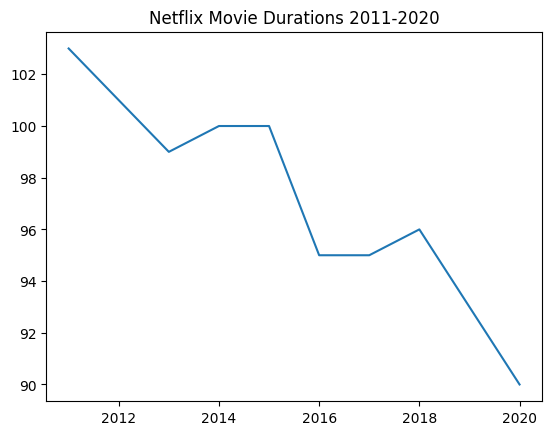

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(durations_df.years, durations_df.durations)

plt.title("Netflix Movie Durations 2011-2020")
plt.show()

In [23]:
netflix_df = pd.read_csv("datasets/netflix_data.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [26]:
netflix_df_movies = netflix_df[netflix_df["type"]=="Movie"]

netflix_movies_col_subset = netflix_df_movies[["title", "country", "genre", "release_year", "duration"]]

netflix_movies_col_subset.head()

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


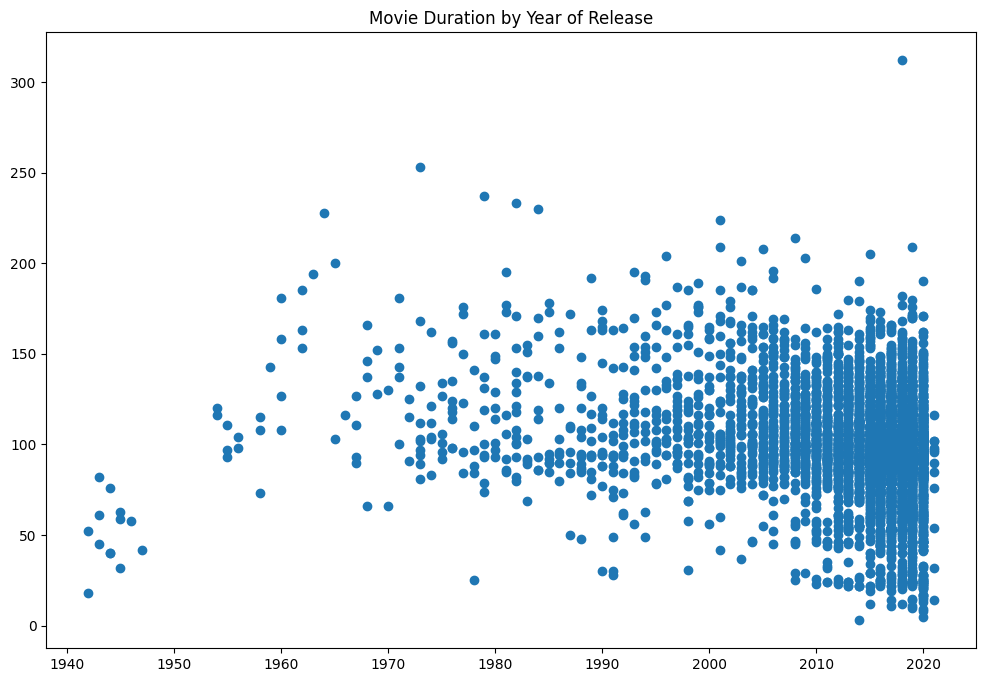

In [30]:
fig = plt.figure(figsize=(12,8))

plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"])

plt.title("Movie Duration by Year of Release")

plt.show()

In [31]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset["duration"]<60]
short_movies.head()

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28


In [41]:
colors = []

# Iterate over rows of netflix_movies_col subset
for i, row in netflix_movies_col_subset.iterrows():
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("black")
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


In [66]:
g = ["Children", "Documentaries", "Stand-Up"]
n = netflix_movies_col_subset[~netflix_movies_col_subset["genre"].isin(g)]
n.tail()

,title,country,genre,release_year,duration
7774,Zodiac,United States,Cult Movies,2007,158
7778,Zombieland,United States,Comedies,2009,88
7780,Zoo,India,Dramas,2018,94
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111


In [65]:
netflix_movies_col_subset.tail()

,title,country,genre,release_year,duration
7781,Zoom,United States,Children,2006,88
7782,Zozo,Sweden,Dramas,2005,99
7783,Zubaan,India,Dramas,2015,111
7784,Zulu Man in Japan,NaN,Documentaries,2019,44
7786,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United Kingdom,Documentaries,2019,90


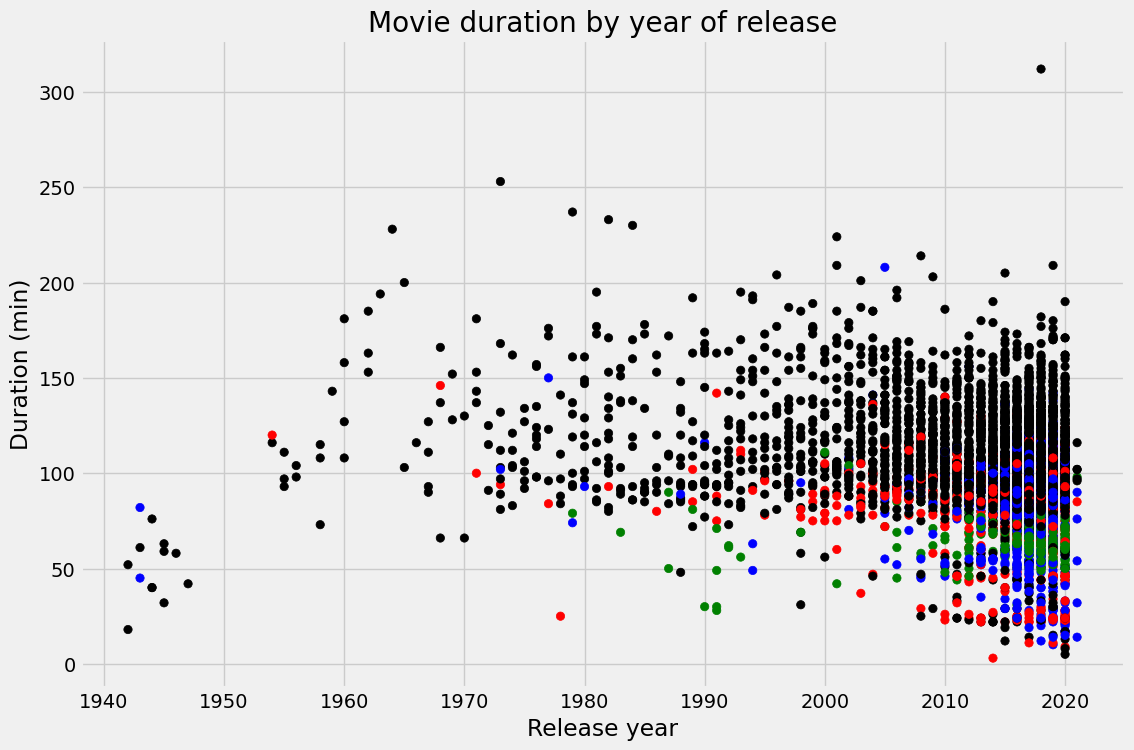

In [73]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8))

# create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset["release_year"], netflix_movies_col_subset["duration"], color=colors)

plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

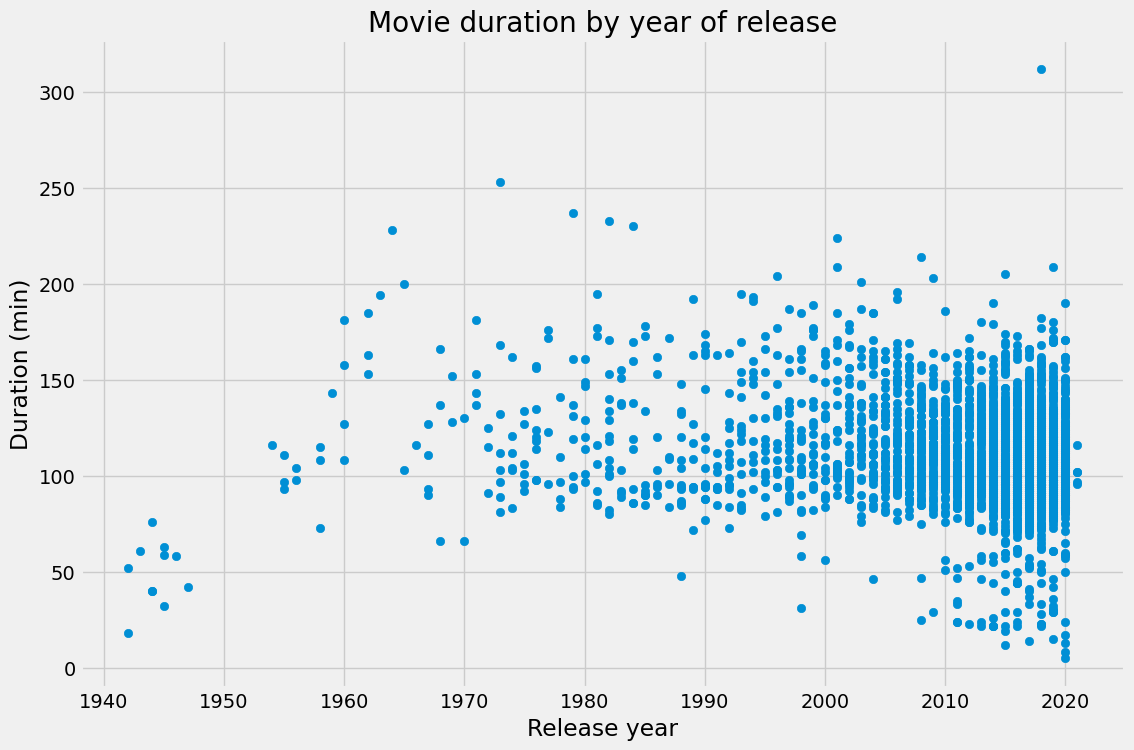

In [71]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 8))

# create a scatter plot of duration versus release_year
plt.scatter(n["release_year"], n["duration"])

plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [67]:
x = n["release_year"]
y = n["duration"]

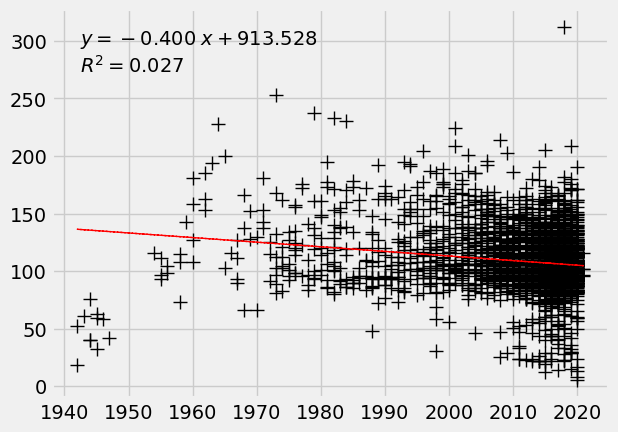

In [76]:
from sklearn.metrics import r2_score

plt.plot(x,y,"+", ms=10, mec="k")
z = np.polyfit(x, y, 1)
y_hat = np.poly1d(z)(x)

plt.plot(x, y_hat, "r--", lw=1)
text = f"$y={z[0]:0.3f}\;x{z[1]:+0.3f}$\n$R^2 = {r2_score(y,y_hat):0.3f}$"
plt.gca().text(0.05, 0.95, text,transform=plt.gca().transAxes,
     fontsize=14, verticalalignment='top');